# Data Exploration and Visualization 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from altair import *
from mpl_toolkits.basemap import Basemap

In [2]:
data = pd.read_csv("/share/GithubAnalysis/pullFiles/Pulls_VS_Total.csv").drop("Unnamed: 0", axis=1)
data.head()

,day,hour,pull_events,total_events,percent_pulls
0,1,0,3552,39026,0.091016
1,1,1,3651,40997,0.089055
2,1,2,2601,41247,0.063059
3,1,3,2590,39555,0.065478
4,1,4,2206,32467,0.067946


# Simple Analysis of Pulls vs Time to look at Github activity patterns

**Are there common times when people like to use github - is it more prominent to see pulls during the day? night? weekends? Also looking at december as a whole, specifically around Christmas and the New Year to see activity levels**

In [3]:
traces = [
    Scatter({
            'x': data.index,
            'y': data.pull_events,
            "name": "# Pull Events"
        }),
    Scatter({
            'x': data.index,
            'y': data.percent_pulls * 10000,
            "name": "% Pull Events"
        })
]

layout = Layout(
    title="Pulls Over Time",
    xaxis=dict(
        title='Time in hours across December',
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=24,
        ticklen=5,
        tickwidth=2,
        tickcolor='#000'
    ),
    yaxis=dict(
        title="# of Pulls",
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=1000,
        ticklen=5,
        tickwidth=2,
        tickcolor='#000'
    )
)
fig = Figure(data=traces, layout=layout)
py.iplot(fig, filename='axes-ticks')

The % Pull Events line shows that the # Pull Events is actually an acurate representation of Github activity as a whole.

From this graph we can see a pattern of weekdays versus weekends. Notice the sequence of 5 large spikes followed by 2 smaller spikes. The first two weeks are fairly even, but the third week drops slightly and the last week (Christmas) is about half the activity. Saturdays appear fairly regular, but Sunday nights stay fairly active. From the trends, it appears that most of Github's users are situated in the same/similar timezone (probably USA/West Europe).

Note: Since time is kept in UTC, 0 hour corresponds to 5 PM SLO time, so most spikes occur around 11 am.

In [4]:
allData = pd.read_csv("/share/GithubAnalysis/pullFiles/combined/combined.csv").drop("Unnamed: 0", axis=1)
allData.head()

,additions,body,changed_files,created_at,deletions,description,event_time,forks_count,has_wiki,language,name,number_commits,open_issues_count,secondary_user,size,user_login,watchers_count
0,81.0,NaN,13.0,2015-10-20T18:21:36Z,178.0,"News, and upcoming releases from the Adventure...",2016-12-12 00:32:15,0,False,CSS,adventurerscodex.github.io,4.0,7,NaN,33379,Sonictherocketman,1
1,366.0,Issue #316\r\n\r\nTorre Agbar:\r\nModel in ble...,13.0,2016-09-27T19:26:16Z,0.0,Video Game project 2016 Software Engineering. ...,2016-12-12 00:21:50,0,True,C#,ES2016B,5.0,17,NaN,271098,jdomenmi7,8
2,104.0,"Updated ""Migration from older versions"" chapte...",2.0,2011-12-09T15:15:43Z,0.0,REST and JAXRS,2016-12-12 00:15:40,652,False,Java,Resteasy,1.0,46,NaN,39365,ronsigal,546
3,4380.0,NaN,4.0,2016-11-20T19:14:17Z,0.0,NaN,2016-12-12 00:10:56,0,True,Jupyter Notebook,Renju,3.0,2,NaN,1241,storandrew,0
4,1.0,NaN,1.0,2016-12-11T16:27:13Z,0.0,NaN,2016-12-12 00:45:07,0,True,NaN,proyect,1.0,1,NaN,0,jlog1994,0


# Analysis of Languages Used in Repos
** We wanted to look at the different languages and their attributes. Which languages are the most common? Least common? and also, looking at number of issues relative to the size of bytes of said language in the repo **

In [5]:
allData["size"] = pd.to_numeric(allData["size"])
allData["open_issues_count"] = pd.to_numeric(allData["open_issues_count"])
allData.groupby("language").sum().sort_values("size")

,additions,changed_files,deletions,forks_count,has_wiki,number_commits,open_issues_count,size,watchers_count
language,,,,,,,,,
DTrace,1.0,1.0,0.0,0,1.0,1.0,0,2,0
MQL4,10.0,1.0,5.0,0,1.0,1.0,1,11,0
Papyrus,148.0,7.0,0.0,3,1.0,1.0,4,25,9
GAMS,0.0,0.0,0.0,2,1.0,1.0,1,53,0
LookML,21.0,3.0,4.0,6,2.0,1.0,3,103,2
Cirru,5.0,1.0,1.0,11,1.0,1.0,3,110,52
Squirrel,18.0,2.0,15.0,20,10.0,8.0,29,134,0
CLIPS,1040.0,18.0,1322.0,8,3.0,15.0,10,162,12
Diff,158.0,2.0,201.0,1,1.0,1.0,3,176,4


In [6]:
temp = allData.groupby("language").sum().sort_values("size", ascending=False)
temp["issuesBySize"] = temp["open_issues_count"] / temp["size"] * 100
temp = temp.head(25)
temp["language"] = temp.index

temp

,additions,changed_files,deletions,forks_count,has_wiki,number_commits,open_issues_count,size,watchers_count,issuesBySize,language
language,,,,,,,,,,,
Java,123333578.0,1654397.0,55010442.0,10747161,40294.0,669983.0,2605519,14290571719,25999397,0.018232,Java
C++,72796641.0,551639.0,59126713.0,12660397,17582.0,330736.0,3244656,4264845262,37961881,0.076079,C++
JavaScript,215497495.0,2128466.0,106887722.0,26547035,79785.0,531182.0,6175883,3252415658,124521909,0.189886,JavaScript
Ruby,33522557.0,439716.0,9719095.0,12012490,29461.0,192783.0,4184286,2482043106,27357626,0.168582,Ruby
Python,88047775.0,573121.0,24449952.0,19108534,42070.0,333285.0,7594696,2460809269,51188786,0.308626,Python
DM,8239542.0,46846.0,8062869.0,1130512,1834.0,31850.0,2063338,2312505343,372117,0.089225,DM
HTML,127119625.0,1060892.0,59932619.0,14744305,22882.0,118521.0,1671885,1413611925,5202015,0.118270,HTML
PHP,63539328.0,743003.0,27588680.0,7533810,21340.0,183174.0,2083640,1325922718,17087943,0.157146,PHP
C#,73815911.0,505995.0,21399455.0,4059843,13587.0,95628.0,2864474,1280085439,13375985,0.223772,C#


In [7]:
layout = Layout({
        'title': 'Size (bytes) vs % Open Issues by Language (top 25 most common by size)',
        'xaxis':{'title':'Size'},
        'yaxis':{'title':'% Open Issues'}
    })

split_traces = [] 

for lang in temp.language:
    split_traces.append(
        Scatter({
            'x': temp[temp.language == lang]["size"],
            'y': temp[temp.language == lang]["issuesBySize"],
            'mode': 'markers',
            'name': lang
        })
    )

split_fig = Figure(data=split_traces, layout=layout)

py.iplot(split_fig)

Based on the above graph, it is clear that Java is the most commonly used programming language on Github. In addition, it is also the language that exhibited the lowest percent of issues based on its size. This is likely because Java has been explored to a large extent and is very commonly used, therefore common problems that occur can be solved by a google search, so issues are less likely to occur. Contrast this with a Julia (a new language used for numerical computing, that is similar to Python and Matlab) which has quite a few more issues per size (1.25%). This is likely due to the fact that Julia is a relatively new language and is mostly unexplored so issues would be common, even at a basic level.

# ZIPF's Law and 80-20 Rule Analysis

**Take a look at watchers, forks, and repo size to determine if any fell into Zipf's law or the 80-20 rule to determine popularity**

In [8]:
temp = allData.drop_duplicates("name") # look only at the unique repos, about 100k

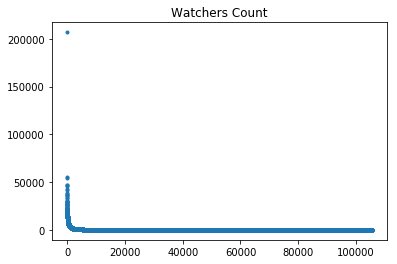

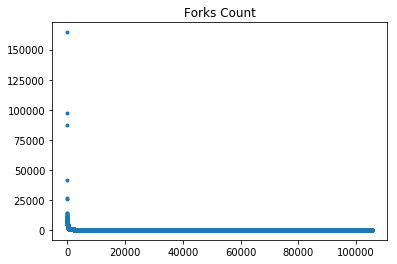

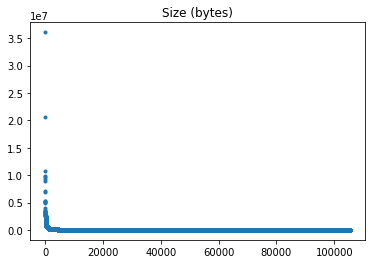

In [9]:
plt.plot(range(len(temp)), temp["watchers_count"].sort_values(ascending=False), ".")
plt.title("Watchers Count")
plt.figure()
plt.plot(range(len(temp)), temp["forks_count"].sort_values(ascending=False), ".")
plt.title("Forks Count")
plt.figure()
plt.plot(range(len(temp)), temp["size"].sort_values(ascending=False), ".")
plt.title("Size (bytes)")

Note that resorting means that the repos are not all the same in each chart (the most watchers is not the largest size). However, all three of these metrics follow a somewhat logarithmic curve. The Size in particular looks as if it might follow Zipfs Law. Lets test it.

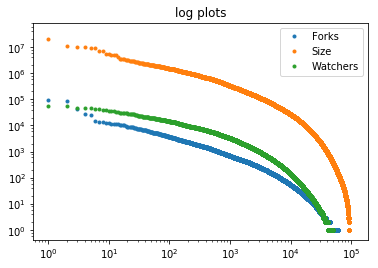

In [10]:
plt.plot(range(len(temp)), temp["forks_count"].sort_values(ascending=False), ".")
plt.plot(range(len(temp)), temp["size"].sort_values(ascending=False), ".")
plt.plot(range(len(temp)), temp["watchers_count"].sort_values(ascending=False), ".")
plt.legend(["Forks", "Size", "Watchers"])
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.title("log plots")

As it turns out, the # of forks is the most Zipf-like. Let's see if the 80-20 rule holds for any of these.

In [16]:
def rev(temp, cat):
    temp = temp.sort_values(cat, ascending = False)
    totalW = temp[cat].sum()
    topP = 0.8 * totalW

    sumW = 0
    for i in range(len(temp)):
        sumW += temp[cat].iloc[i]
        if sumW >= topP:
            break

    return topP, sumW, i, i / len(temp) * 100

In [17]:
print(rev(temp, "watchers_count"))
print(rev(temp, "forks_count"))
print(rev(temp, "size"))

(12043228.0, 12043985, 3606, 3.4219666344018678)
(3500173.6, 3500185, 5049, 4.791322666970335)
(1507251682.4, 1507294356, 5791, 5.495454459185029)


Conclusion: None of these metrics follow the 80-20 rule.

# Bot Analysis

**CI servers often use bot accounts on Github to watch and pull. Which one is most popular?**

In [13]:
pattern = "\-bot$|\[bot\]$"
botDf = temp[(temp["user_login"].str.contains(pattern, na=False)) | (temp["secondary_user"].str.contains(pattern, na=False))]

In [14]:
#botDf["bot_name"] = botDf["secondary_user"] if botDf["secondary_user"].str.contains("bot", na=False) else botDf["user_login"]
botDf["bot_inSecond"] = botDf["secondary_user"].str.contains(pattern, na=False)
botDf["bot_name"] = np.where(botDf["bot_inSecond"] == True, botDf["secondary_user"], botDf["user_login"])
botDf

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,additions,body,changed_files,created_at,deletions,description,event_time,forks_count,has_wiki,language,name,number_commits,open_issues_count,secondary_user,size,user_login,watchers_count,bot_inSecond,bot_name
13,1.0,"Hello lovely humans,\n\n[ember-moment](https:/...",1.0,2015-06-23T00:18:45Z,1.0,Ember web application for Code Corps.,2016-12-12 00:06:19,56,True,JavaScript,code-corps-ember,1.0,161,NaN,3225,greenkeeperio-bot,69,False,greenkeeperio-bot
16,NaN,"We can discuss naming for the prime tests, I k...",NaN,2016-02-23T19:41:40Z,NaN,Basic arithmetic types and operations,2016-12-12 00:34:09,0,True,Swift,ArithmeticTools,NaN,7,houndci-bot,1825,brianlheim,1,True,houndci-bot
28,1.0,"Hello lovely humans,\n\n[pre-commit](https://w...",1.0,2016-07-16T21:41:35Z,1.0,:paperclip: Shell script to check for typos on...,2016-12-12 00:26:06,0,True,Shell,precomm-spellcheck,1.0,2,NaN,8,greenkeeperio-bot,0,False,greenkeeperio-bot
36,1.0,\nThere's a new version of [setuptools](https:...,1.0,2014-04-03T09:58:33Z,1.0,aiopg is a library for accessing a PostgreSQL ...,2016-12-12 00:02:31,51,True,Python,aiopg,1.0,16,NaN,932,pyup-bot,355,False,pyup-bot
64,1.0,\nThere's a new version of [flask-mongoengine]...,1.0,2013-07-07T00:42:27Z,1.0,"CMS (Content Management System) - Python, Flas...",2016-12-12 00:00:06,341,True,Python,quokka,1.0,104,NaN,5534,pyup-bot,1507,False,pyup-bot
92,1.0,"Hello lovely humans,\n\n[pre-commit](https://w...",1.0,2015-03-19T08:50:36Z,1.0,Create a JSDom instance for browserless testin...,2016-12-12 00:26:56,6,True,JavaScript,jsdomify,1.0,30,NaN,177,greenkeeperio-bot,70,False,greenkeeperio-bot
98,1.0,"Hello lovely humans,\n\n[pre-commit](https://w...",1.0,2015-07-30T00:08:39Z,1.0,Node.js Implementation of the Kademlia router ...,2016-12-12 00:28:55,5,False,JavaScript,js-libp2p-kad-routing,1.0,2,NaN,110,greenkeeperio-bot,5,False,greenkeeperio-bot
123,1.0,"Hello lovely humans,\n\n[pre-commit](https://w...",1.0,2016-02-12T11:16:34Z,1.0,NaN,2016-12-12 00:25:00,0,True,NaN,deps,1.0,707,NaN,385,greenkeeperio-bot,0,False,greenkeeperio-bot
146,1.0,"Hello lovely humans,\n\n[ember-moment](https:/...",1.0,2015-12-01T19:07:23Z,1.0,NaN,2016-12-12 00:06:24,0,True,JavaScript,exsules-web,1.0,40,NaN,329,greenkeeperio-bot,0,False,greenkeeperio-bot
159,1.0,"Hello lovely humans,\n\n[pre-commit](https://w...",1.0,2016-03-06T23:17:54Z,1.0,multiplex implementation wrapper that is compa...,2016-12-12 00:49:21,3,False,JavaScript,js-libp2p-multiplex,1.0,1,NaN,31,greenkeeperio-bot,5,False,greenkeeperio-bot


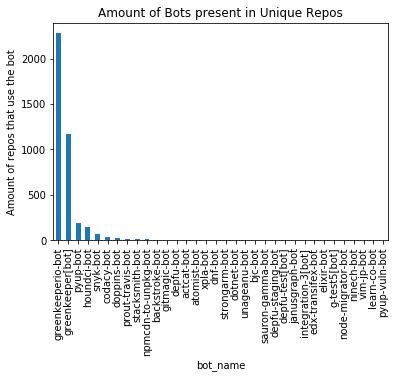

In [15]:
bots = botDf.groupby("bot_name")["bot_name"].count().sort_values(ascending=False)
bots.plot.bar(title = 'Amount of Bots present in Unique Repos').set_ylabel("Amount of repos that use the bot")

So greenkeeper appears to be the most popular bot by far for unique repos.